# Statistical Analysis

[This notebook](https://github.com/dattalab/keypoint-moseq/blob/main/docs/source/analysis.ipynb) contains routines for analyzing the output of keypoint-MoSeq.

```{note}
The interactive widgets require jupyterlab launched from the `keypoint_moseq` environment. They will not work properly in jupyter notebook.
```


## Setup

We assume you have already have keypoint-MoSeq outputs that are organized as follows.
```
<project_dir>/               ** current working directory
└── <model_name>/            ** model directory
    ├── results.h5           ** model results
    └── grid_movies/         ** [Optional] grid movies folder
```
Use the code below to enter in your project directory and model name.

In [1]:
import keypoint_moseq as kpms

project_dir=r'C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1' # the full path to the project directory
model_name='2024_01_04-13_41_21' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)


## Assign Groups

The goal of this step is to assign group labels (such as "mutant" or "wildtype") to each recording. These labels are important later for performing group-wise comparisons.
- The code below creates a table called `{project_dir}/index.csv` and launches a widget for editing the table. To use the widget:
    - Click cells in the "group" column and enter new group labels.
    - Hit `Save group info` when you're done.
- **If the widget doesn't appear**, you also edit the table directly in Excel or LibreOffice Calc.

In [2]:
kpms.interactive_group_setting(project_dir, model_name, index_filename='index.csv')

TypeError: standalone_docs_json_and_render_items() takes 1 positional argument but 2 were given

Row
    [0] Tabulator(editors={'name': None, ...}, show_index=False, titles={'name': 'recording name',...}, value=          group  ..., widths={'name': 400})
    [1] Column
        [0] Button(button_type='primary', name='Save group info')

## Generate dataframes

Generate a pandas dataframe called `moseq_df` that contains syllable labels and kinematic information for each frame across all the recording sessions. 

In [7]:
index_filename = "index_GMM_among_defeated.csv"
moseq_df = kpms.compute_moseq_df(project_dir, model_name, fps=20, smooth_heading=True, index_filename=index_filename) 
moseq_df

,name,centroid_x,centroid_y,centroid_z,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,pre101,-4.890107,5.460056,1.800803,0.423362,0.000000,0.000000,7,0,control,True
1,pre101,-4.269766,5.373690,0.887762,0.452157,0.140808,22.144306,7,1,control,False
2,pre101,-4.569123,5.635958,1.173214,0.423362,0.297305,9.795562,7,2,control,False
3,pre101,-4.900844,5.466158,1.408959,0.452157,0.475994,8.819206,7,3,control,False
4,pre101,-4.684514,5.418027,1.637164,0.452157,0.668536,6.362174,7,4,control,False
...,...,...,...,...,...,...,...,...,...,...,...
908595,pre515,7.301109,-7.684746,4.589743,-0.685434,-0.536681,17.367390,2,11795,susceptible,False
908596,pre515,7.286511,-7.731138,4.522948,-0.716127,-0.418509,1.652496,2,11796,susceptible,False
908597,pre515,7.020144,-7.343358,4.684829,-0.716127,-0.308097,9.950481,2,11797,susceptible,False
908598,pre515,6.738294,-6.960769,4.991628,-0.758452,-0.203938,11.312629,2,11798,susceptible,False


Next generate a dataframe called `stats_df` that contains summary statistics for each syllable in each recording session, such as its usage frequency and its distribution of kinematic parameters.

In [8]:
index_filename = index_filename

stats_df = kpms.compute_stats_df(
    project_dir,
    model_name,
    moseq_df, 
    min_frequency=0.005,       # threshold frequency for including a syllable in the dataframe
    groupby=['group', 'name'], # column(s) to group the dataframe by
    fps=20,
    index_filename=index_filename)                    # frame rate of the video from which keypoints were inferred

stats_df

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,control,pre101,0,0.300114,1.743290,-3.065187,3.126728,0.041151,6.183400,-124.841955,123.798027,15.734908,6.663298,2.343172,42.528489,0.121726,0.525949
1,control,pre101,1,0.192304,1.486307,-3.137526,3.114187,0.123514,6.251990,-122.839748,3.408401,16.852922,7.153993,1.992306,39.493306,0.077042,0.403000
2,control,pre101,2,0.305774,1.851624,-3.121521,3.113962,-0.053589,11.705295,-125.537627,125.488394,16.218228,6.830357,1.771851,35.085959,0.072419,0.369149
3,control,pre101,3,-0.036918,1.882042,-3.125108,3.133265,0.129068,10.886630,-125.438351,125.350329,16.602214,7.346626,1.620029,49.299980,0.070878,0.722826
4,control,pre101,4,-0.087757,1.867114,-3.129096,3.135656,0.016667,11.494598,-125.091086,125.204968,15.457976,6.398990,0.591141,42.712148,0.084746,1.069091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,susceptible,pre515,21,-1.240327,0.524889,-1.606438,-0.384012,-0.942498,0.614670,-1.601056,0.106852,19.716719,11.455943,7.898648,40.477605,0.002030,0.200000
1955,susceptible,pre515,22,-1.768156,1.069449,-3.136776,-0.206644,9.055549,36.459809,-2.513195,124.792208,16.079803,6.301631,5.728395,26.151727,0.003046,0.200000
1956,susceptible,pre515,23,2.632228,0.253962,2.224416,2.839604,1.392337,0.468993,0.634371,1.849669,19.154705,9.544158,3.718650,32.040707,0.001015,0.450000
1957,susceptible,pre515,24,0.827674,0.635955,-0.144431,2.118589,-0.051019,0.604714,-2.531523,0.988502,15.894463,6.700538,1.484927,36.764248,0.014213,0.764286


### **Optional:** Save dataframes to csv
Uncomment the code below to save the dataframes as .csv files

In [9]:
import os

# save moseq_df
save_dir = os.path.join(project_dir, model_name) # directory to save the moseq_df dataframe
moseq_df.to_csv(os.path.join(save_dir, 'moseq_df_GMM_among_defeated.csv'), index=False)
print('Saved `moseq_df` dataframe to', save_dir)

# save stats_df
save_dir = os.path.join(project_dir, model_name)
stats_df.to_csv(os.path.join(save_dir, 'stats_df_GMM_among_defeated.csv'), index=False)
print('Saved `stats_df` dataframe to', save_dir)

Saved `moseq_df` dataframe to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21
Saved `stats_df` dataframe to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21


##  Label syllables

The goal of this step is name each syllable (e.g., "rear up" or "walk slowly").
- The code below creates an empty table at `{project_dir}/{model_name}/syll_info.csv` and launches an interactive widget for editing the table. To use the widget:
    - Select a syllable from the dropdown to display its grid movie.
    - Enter a name into the `label` column of the table (and optionally a short description too).
    - When you are done, hit `Save syllable info` at the bottom of the table.
- **If the widget doesn't appear**, you can also edit the file directly in Excel or LibreOffice Calc.

In [ ]:
kpms.label_syllables(project_dir, model_name, moseq_df) 

## Compare between groups

Test for statistically significant differences between groups of recordings. The code below takes a syllable property (e.g. frequency or duration), plots its disribution for each syllable across for each group, and also tests whether the property differs significantly between groups. The results are summarized in a plot that is saved to `{project_dir}/{model_name}/analysis_figures`.

There are two options for setting the order of syllables along the x-axis. When `order='stat'`, syllables are sorted by the mean value of the statistic. When `order='diff'`, syllables are sorted by the magnitude of difference between two groups that are determined by the `ctrl_group` and `exp_group` keywords. Note `ctrl_group` and `exp_group` are not related to significance testing.

In [12]:
# 내 프로젝트에서 stats_df의 'control'은 ANOVA등 통계 분석에 R, S와 함께 비교될 수 없음. 따라서 아래처럼 groups에 지정된 group만 필터링하여, 통계분석에 사용하도록 설정해야 함.
# 왜냐하면 아래 kpms.plot_syll_stats_with_sem 함수는 stats_df의 모든 그룹에 대해 통계처리를 하기 때문.
import os
import pandas as pd
index_filename = "index_GMM_among_defeated.csv"

stats_df = pd.read_csv(os.path.join(project_dir, model_name, 'stats_df_GMM_among_defeated.csv'))
groups = ['resilient','susceptible'] # groups to be plotted
stats_df = stats_df[stats_df['group'].isin(groups)]

c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\heading_mean_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\heading_std_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\heading_min_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\heading_max_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\angular_velocity_mean_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\angular_velocity_std_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\angular_velocity_min_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\angular_velocity_max_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\velocity_px_s_mean_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\velocity_px_s_std_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\velocity_px_s_min_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\velocity_px_s_max_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\frequency_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1152: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\duration_stat_stats.png


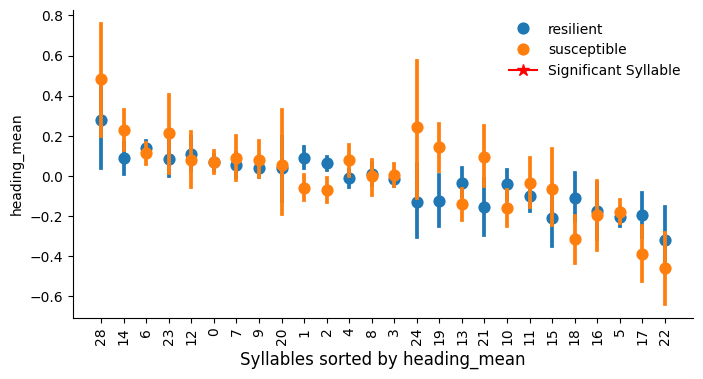

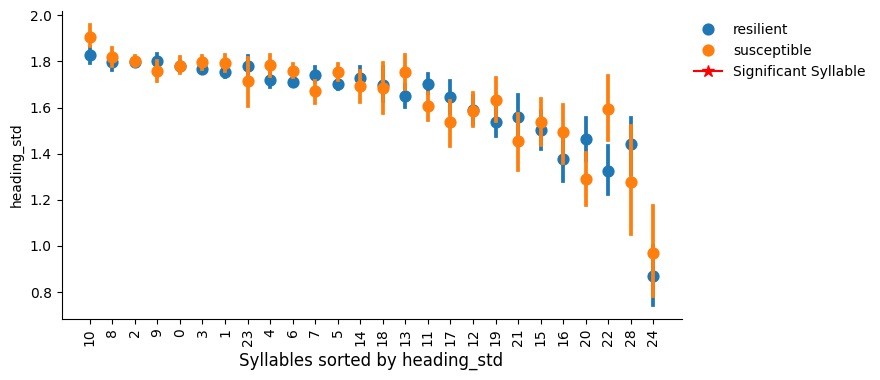

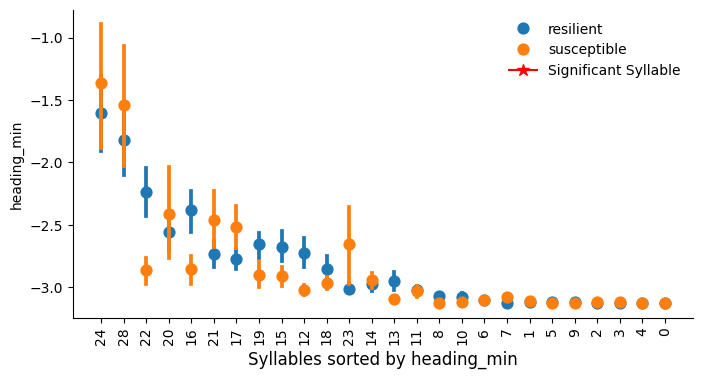

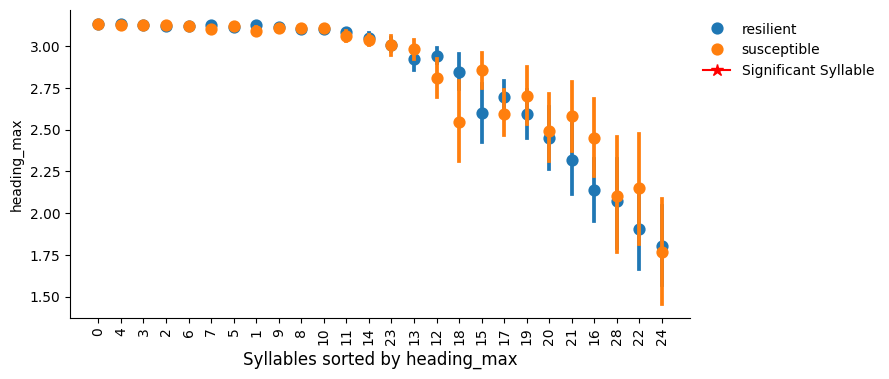

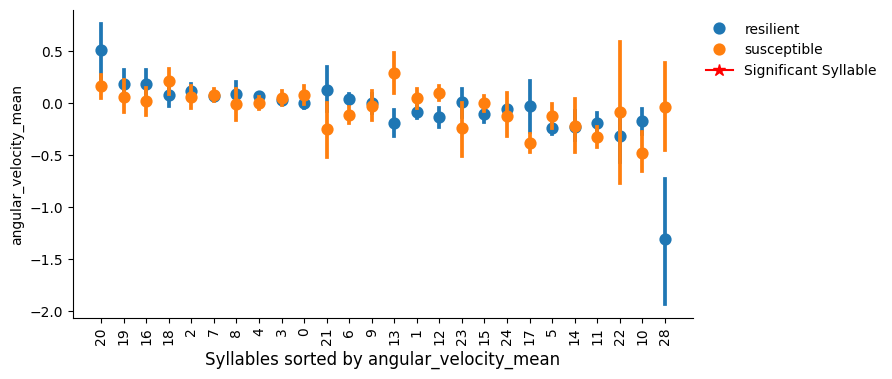

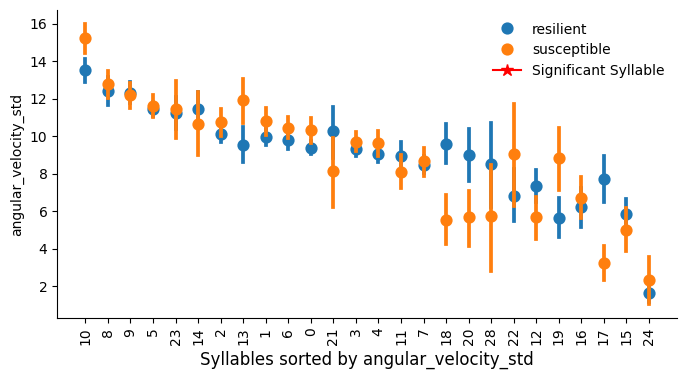

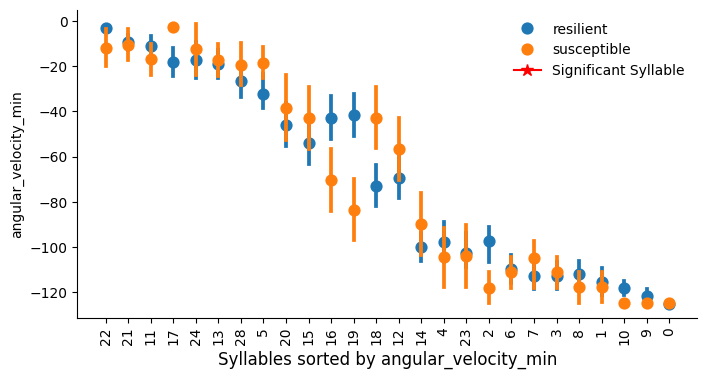

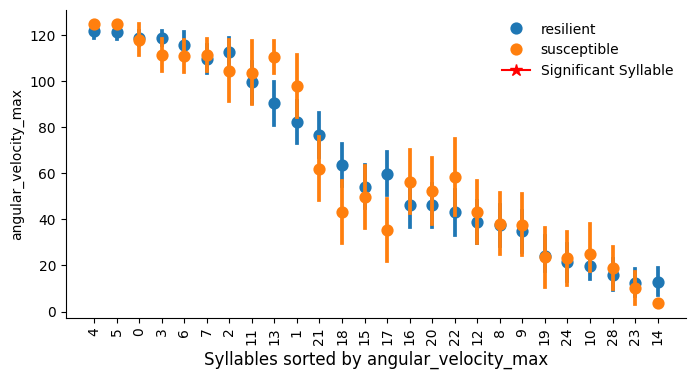

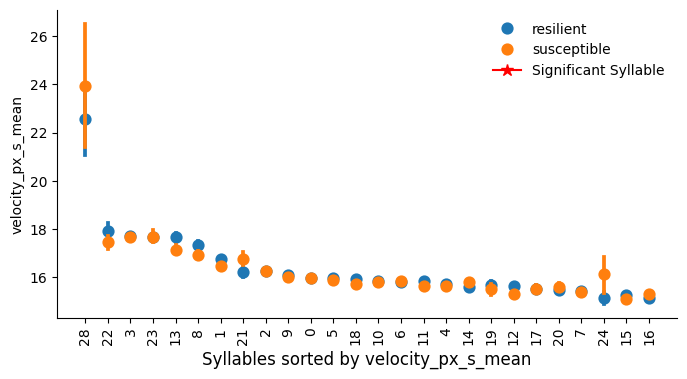

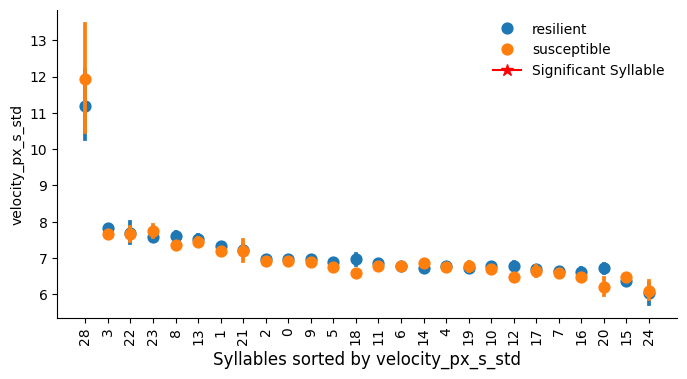

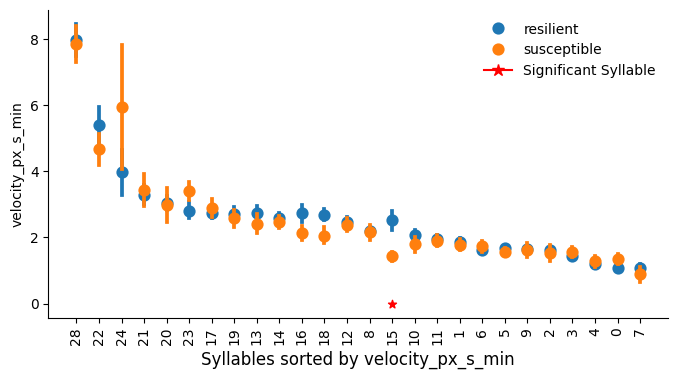

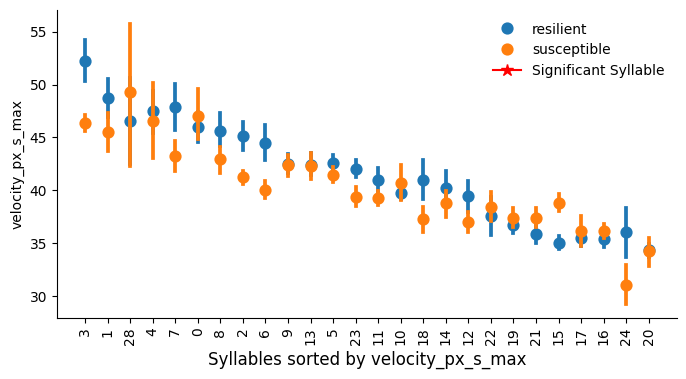

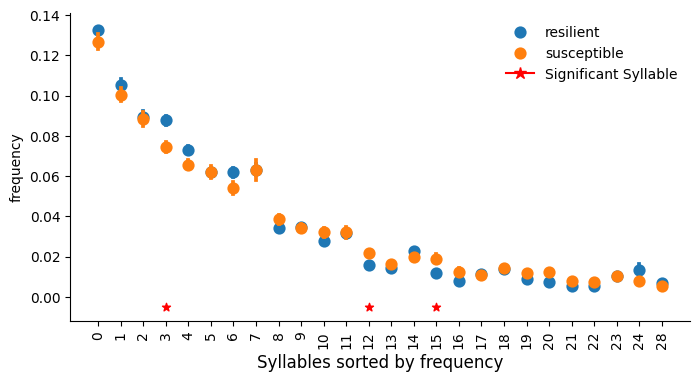

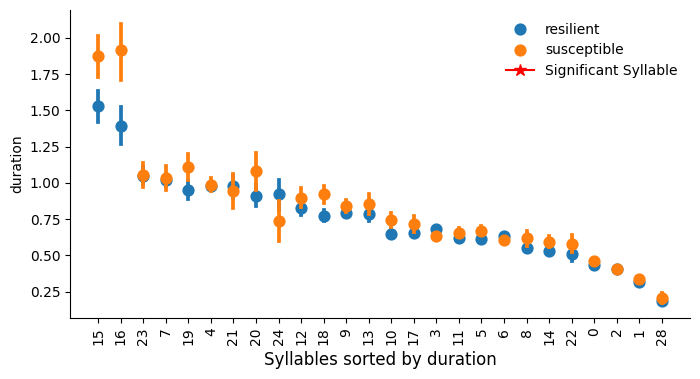

In [13]:
stats = ['heading_mean', 'heading_std', 'heading_min', 'heading_max', 'angular_velocity_mean', 
    'angular_velocity_std', 'angular_velocity_min', 'angular_velocity_max', 'velocity_px_s_mean', 
    'velocity_px_s_std', 'velocity_px_s_min', 'velocity_px_s_max', 'frequency', 'duration'
    ]

for stat in stats:
    kpms.plot_syll_stats_with_sem(
    stats_df, project_dir, model_name,
    plot_sig=True,    # whether to mark statistical significance with a star
    thresh=0.05,      # significance threshold
    stat=stat, #statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
    order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
    ctrl_group='resilient',   # name of the control group for statistical testing
    exp_group='susceptible',    # name of the experimental group for statistical testing
    figsize=(8, 4),   # figure size    
    join=False,        # whether to join syllables with a line
    groups=groups, # groups to be plotted
    #groups=stats_df['group'].unique(), # groups to be plotted
)

In [ ]:
kpms.plot_syll_stats_with_sem(
    moseq_df, project_dir, model_name,
    plot_sig=True,    # whether to mark statistical significance with a star
    thresh=0.05,      # significance threshold
    stat='angular_velocity_max', # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
    order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
    ctrl_group='resilient',   # name of the control group for statistical testing
    exp_group='susceptible_extreme',    # name of the experimental group for statistical testing
    figsize=(8, 4),   # figure size    
    join=False,        # whether to join syllables with a line
    groups=groups, # groups to be plotted
    #groups=stats_df['group'].unique(), # groups to be plotted
)

### Transition matrices
Generate heatmaps showing the transition frequencies between syllables.

In [23]:
print(len(trans_mats[3]))

IndexError: list index out of range

Group(s): control, resilient, susceptible
Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\transition_matrices.png


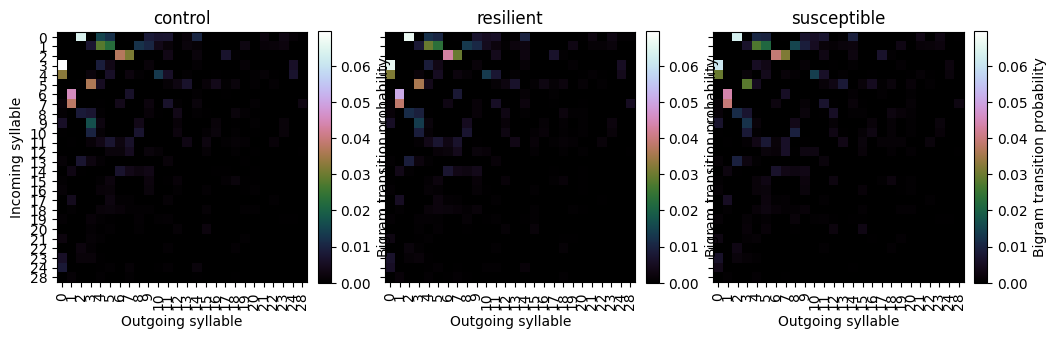

In [24]:
normalize='bigram' # normalization method ("bigram", "rows" or "columns")

trans_mats, usages, groups, syll_include=kpms.generate_transition_matrices(
    project_dir, model_name, normalize=normalize,
    min_frequency=0.005, # minimum syllable frequency to include
    index_filename=index_filename
)    

#groups = ['resilient', 'susceptible'] # groups to be plotted

kpms.visualize_transition_bigram(
    project_dir, model_name, groups, trans_mats, syll_include, normalize=normalize, 
    show_syllable_names=True # label syllables by index (False) or index and name (True)
)

### Syllable Transition Graph
Render transition rates in graph form, where nodes represent syllables and edges represent transitions between syllables, with edge width showing transition rate for each pair of syllables (secifically the max of the two transition rates in each direction).

Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\transition_graphs.png


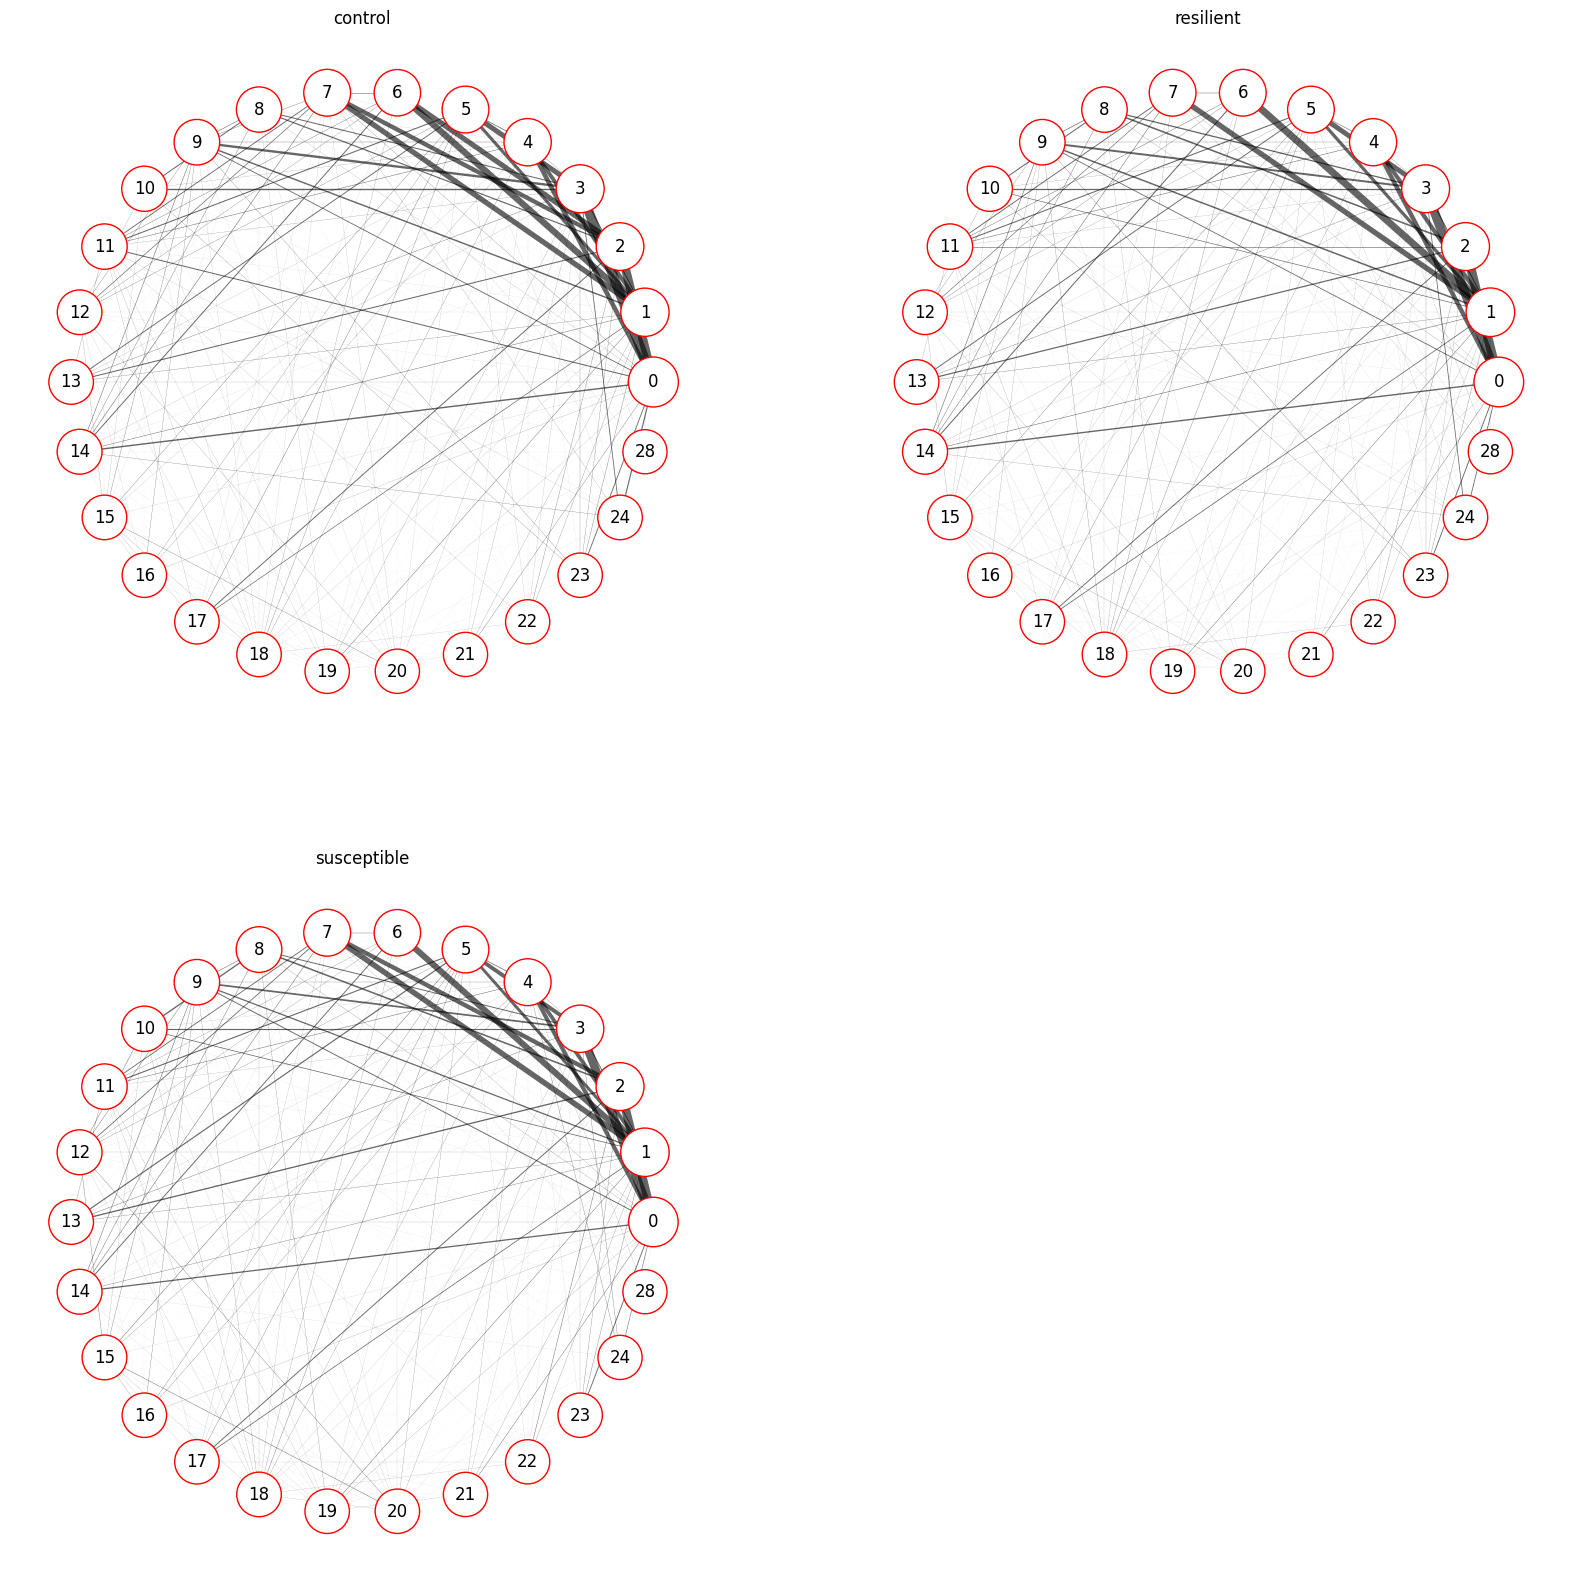

In [25]:
# Generate a transition graph for each single group

kpms.plot_transition_graph_group(
    project_dir, model_name, 
    groups, trans_mats, usages, syll_include, 
    layout='circular',        # transition graph layout ("circular" or "spring")
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

Saved figure to C:\Users\MyPC\Desktop\git\kp_moseq\keypoint-moseq\project\SDSBD\dataset5\trainset1\2024_01_04-13_41_21\figures\transition_graphs_diff.png


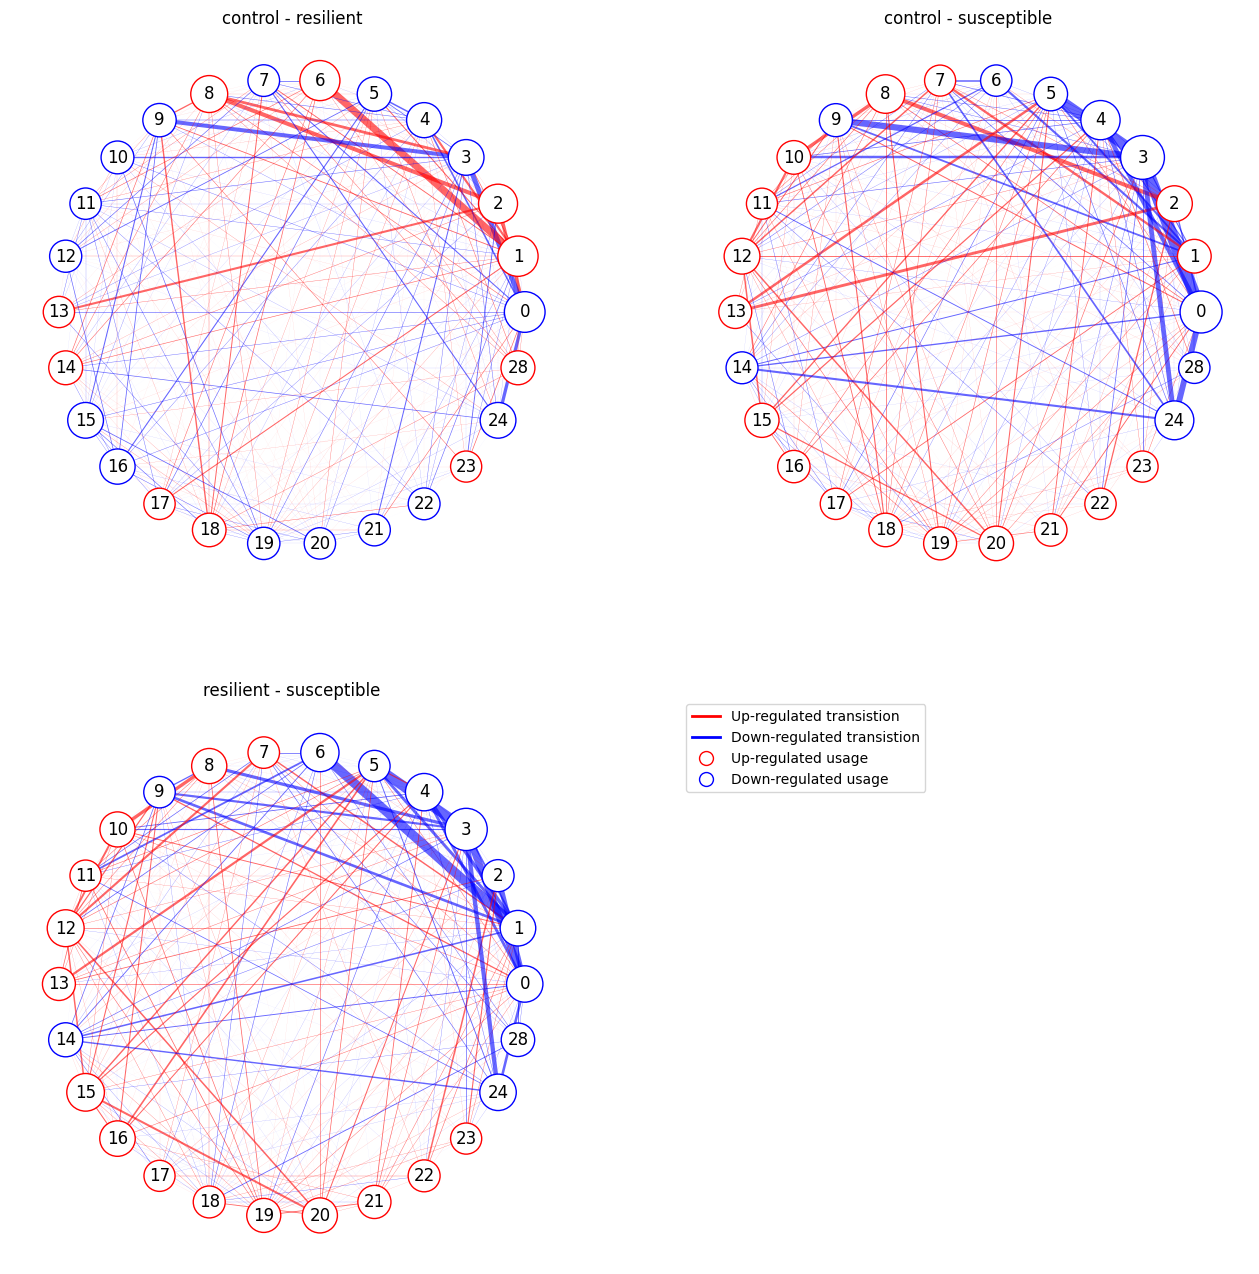

In [26]:
# Generate a difference-graph for each pair of groups.

kpms.plot_transition_graph_difference(project_dir, model_name, 
                                      groups, trans_mats, usages, syll_include, 
                                      layout='circular') # transition graph layout ("circular" or "spring")